In [34]:
import sys
sys.path.append('..')

from glob import glob

import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from pytorch_lightning.callbacks import RichProgressBar
from pytorch_lightning.callbacks.progress.rich_progress import RichProgressBarTheme

from models import Surrogate
from dataset import GISAXSDataModule


def get_rich_bar():
    return  RichProgressBar(
                theme=RichProgressBarTheme(
                    description="black",
                    progress_bar="green",
                    progress_bar_finished="green",
                    progress_bar_pulse="#6206E0",
                    batch_progress="green",
                    time="gray48",
                    processing_speed="gray48",
                    metrics="gray48",
                )
            )

In [2]:
mode = '1d'
batch_size = 32
train_frac = 0.8

n_layers = 3
path = '/bigdata/hplsim/aipp/Maksim/BA_simulation/layer_{}/'.format(n_layers)
in_shape = (1200,120)
out_shape = (1200,120)
to_preload = True

to_augment = False
sigma = 0.01
drop_y = 0.05
sp_prob = 0.01

In [3]:
model = Surrogate(n_layers*6, out_shape[0], 'l1')

In [4]:
indices = range(0,100)
data_module = GISAXSDataModule(mode, batch_size, train_frac,
                               path=path, indices=indices, to_preload=to_preload, to_augment=to_augment,
                               in_shape=in_shape, out_shape=out_shape,
                               sigma=sigma, drop_y=drop_y, sp_prob=0.01)

data_module.setup()

100%|██████████| 100/100 [00:03<00:00, 30.81it/s]


In [71]:
model = model.load_from_checkpoint(glob("../csv_logs/1d_surrogate/version_5/checkpoints/*")[0])

In [72]:
x,y = next(iter(data_module.train_dataloader()))
device = "cuda" if torch.cuda.is_available() else "cpu"
x_hat = model.model(y.to(device)).cpu().detach().numpy()

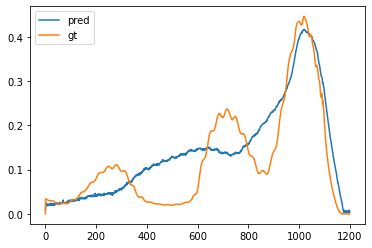

In [73]:
i = 4
plt.plot(x_hat[i], label = 'pred')
plt.plot(x[i], label = 'gt')
plt.legend()

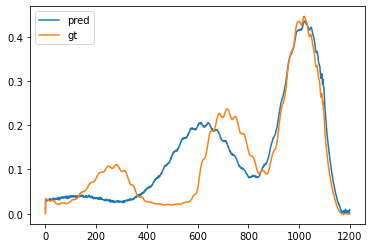

In [50]:
i = 4
plt.plot(x_hat[i], label = 'pred')
plt.plot(x[i], label = 'gt')
plt.legend()